# Dimensionality Reduction

In [ ]:
# Material yet to be cleaned and prepared...

As we have seen in many examples, most of the data we work with are multi-dimensional, meaning data points consist of a series of variables (or features).

Even in cases where we can still comfortably represent the data in tabular form, certain comparisons cannot be easily made because we have to deal with too many variables. The classic example is plotting data points in a 2D or at most a 3D scatter plot.

Data that include age, weight, and height can still be represented in 3D. But what if we add working hours, income, wealth, eye color, etc.?

The fact that we can no longer represent all variables simultaneously in such a plot might not seem like a dramatic problem at first. But behind this lies a much more general difficulty that high-dimensional data bring, also known as the **curse of dimensionality**. This refers to the drastic increase in volume when adding more dimensions.

**Example:**  
100 elevation markings along a 100m distance are sufficient to create a proper elevation profile. However, for a 100m x 100m area, 10021002 points would be needed, and so on.

We can also phrase this differently. A thousand well-distributed data points can give a good representation of a 2D or 3D space. In the example above, this means that I have people with high age, high weight, and great height, but also with low age but similar weight and height, etc. That is, I have data (here: people) that can describe most "corners" and parts of my space. But if those thousand data points now have 20 additional properties (income, shoe size, eye color, working hours, vacation days, ...), then I need many more data points to characterize this now 23-dimensional space.

We can also imagine that we want to find a person Y who is similar to person X. Maybe we find someone with a similar age, weight, and height. The income and shoe size may still fit. But the more dimensions our data have, the less likely it is that this will also apply to the other features. Therefore, the many dimensions of the data are not only a problem in graphical representation, but also in cluster analysis or for predictions.

A very commonly used technique in the field of data science is therefore **dimensionality reduction**. These are techniques aimed at retaining the most important information while simultaneously reducing the number of dimensions. It is, therefore, a form of data compression.


```{figure} ../images/fig_curse_of_dimensionality_01.png
:name: fig_dimensionality_reduction01

In many cases, we will work with data that has more than just 2 or 3 relevant features (or: dimensions). While age, weight, and height might all be of interest when we analyze a dataset on people, it is not very likely that this will be sufficient to reveal very interesting patterns. We can easily plot 2 or 3 features (see (a)). But what do we do if we want to add additional features, maybe even *many* additional features?
The *curse of dimensionality* can be understood by imagining that we have to fully explore a feature space. 2D and 3D are relatively straightforward, but when we have to cover a much higher dimensional space we simply need far too many datapoints to *cover* this space reasonably well (see (b)).
```

### Feature Selection

A variant of dimensionality reduction is **feature selection**. The goal here is to identify features of the least importance for our specific task and remove them from the data. Common methods include:

- Features that are highly correlated (*high correlation filter*).
- Features that show little variation (*low variance filter*).
- Features that are not very reliable (e.g., *missing value threshold*).
- Features that a machine learning model deems most important (e.g., a Random Forest model).

This type of feature selection has the advantage that the steps are often easy to understand. No abstract features are created (as in PCA), and the results are easily reproducible.

However, in practice, especially with higher-dimensional data, the disadvantages often outweigh these benefits. For one, such feature selection usually only allows for modest data compression, meaning that even with large datasets, many dimensions remain. Additionally, it's often challenging to decide what is important and what is not. This step requires extensive knowledge about the individual features and the questions posed.

### Feature Projection

An entirely different approach from feature selection is pursued with special algorithms for dimensionality reduction. Typically, the number of resulting dimensions can be arbitrarily defined. In summary, this is about **feature projection**, i.e., the transformation of data from a high-dimensional space into a low-dimensional space. These transformations can be linear (e.g., PCA) or non-linear (e.g., Kernel-PCA).

## PCA (Principal Component Analysis)

Principal Component Analysis (PCA) is a fundamental technique in dimensionality reduction. It's particularly useful for reducing the complexity of data, improving the interpretability of datasets, and in some cases, enhancing the performance of machine learning algorithms. Let's delve into the details of how PCA works.

### Concept

PCA involves the following key steps:

1. **Standardization**: PCA is sensitive to the scale of the features, so it's common to standardize the data before applying PCA.
2. **Covariance Matrix Computation**: This matrix represents the covariance (a measure of how much two variables change together) between each pair of features in the data.
3. **Eigenvalue Decomposition**: This process involves finding the eigenvalues and eigenvectors of the covariance matrix. These eigenvectors determine the directions of the new feature space, and the eigenvalues determine their magnitude (or the variance carried by each principal component).
4. **Selection of Principal Components**: Principal components are the new set of variables that are obtained from the initial set of variables. They are selected based on the eigenvalues, as the eigenvectors with the highest eigenvalues carry the most information about the distribution of the data.

### Mathematical Formulation

1. **Standardization**: Each feature XiXi is scaled to have a mean of 0 and a standard deviation of 1.

2. **Covariance Matrix ($\Sigma$) Calculation**:

   $$
   \Sigma  = \frac{1}{n-1} \left( X - \bar{X} \right)^T \left( X - \bar{X} \right)
   $$

   where $X$ is the feature matrix, and $\bar{X}$ is the mean vector of $X$.

4. **Eigenvalue Decomposition**:

   Solve $\Sigma v=\lambda v$, where $\lambda$ are eigenvalues, and $v$ are eigenvectors.

5. **Selecting Principal Components**: The eigenvectors with the highest eigenvalues are chosen as the principal components.

## Practical Example with Python

We'll create a 2D dataset and apply PCA to reduce it to 1D. First, we'll generate a synthetic dataset.

### Generating Synthetic Data

Let's create a dataset of 2 features with a clear linear relationship.

### Applying PCA

We will then standardize this data and apply PCA to reduce its dimensionality.

### Visualizing the Result

Finally, we will visualize the original dataset and the dataset after PCA transformation.

Let's start by generating the dataset and performing PCA.

### Python Implementation

We'll now write and execute Python code to demonstrate these steps

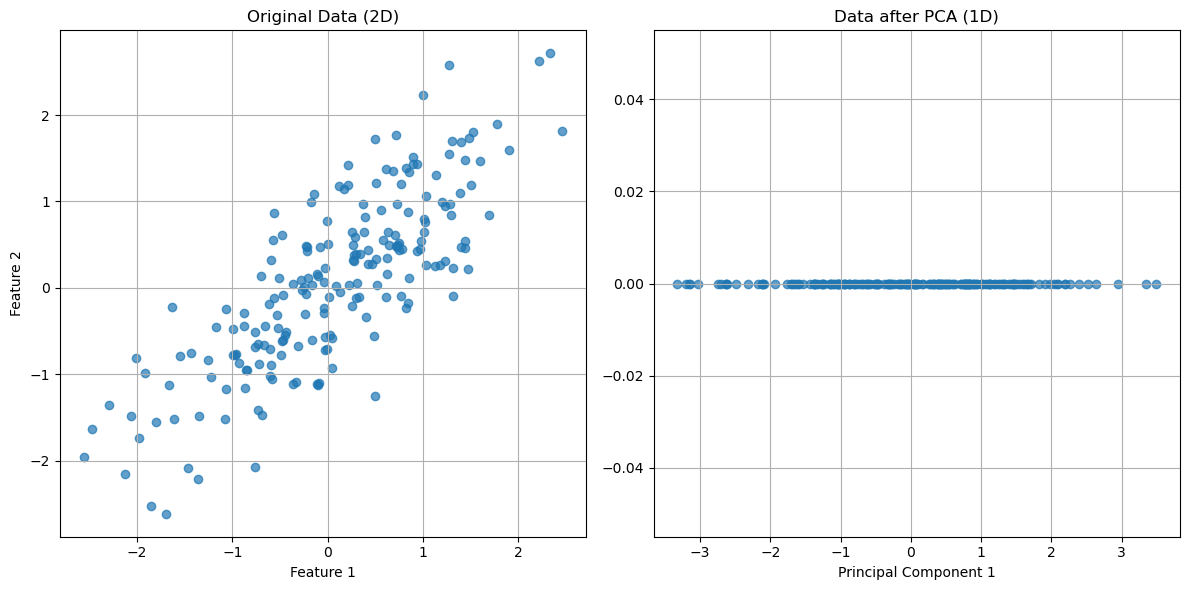

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Generating a synthetic 2D dataset
np.random.seed(0)
X = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.8], [0.8, 1]], size=200)

# Standardizing the dataset
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Applying PCA to reduce dimensionality from 2D to 1D
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_std)

# Plotting the original data and the principal component
plt.figure(figsize=(12, 6))

# Original Data (before PCA)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Original Data (2D)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

# Data after PCA transformation
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], np.zeros(len(X_pca)), alpha=0.7)
plt.title("Data after PCA (1D)")
plt.xlabel("Principal Component 1")
plt.grid(True)

plt.tight_layout()
plt.show()

In the figures above, we can see a clear demonstration of PCA in action:

1. Original Data (2D): The left plot shows our synthetic 2D dataset. The dataset exhibits a linear relationship between the two features, making it a good candidate for PCA.

2. Data after PCA (1D): The right plot shows the data after applying PCA and reducing its dimensionality to 1D. This plot represents the projection of the original data onto the first principal component. This principal component is a line that best represents the variance in the dataset.

By transforming the data onto this principal component, we've effectively reduced its dimensionality while retaining the most important variance in the data. PCA has simplified the dataset, making it easier to analyze and visualize, and potentially improving the efficiency and performance of subsequent data processing or machine learning algorithms. ​
​

## Non-linear Dimensionality Reduction Techniques

PCA is a very fast and often used dimensionality reduction technique. Its main disadvantage is, that it is a *linear technique* and hence not well suited to work with highly non-linear data. For those cases, several alternatives exist, a few of which will be introduced in this section.

Let's first see what this limitation actually means.

In [2]:
# Generate fake data
np.random.seed(0)
r = np.concatenate((np.random.normal(1, 0.1, 200),
                    np.random.normal(0, 0.3, 100)))
phi = 100 * np.random.random(300)
x = r * np.cos(phi)
y = r * np.sin(phi)

labels = np.array(200*["crimson"] + 100*["teal"])
gen_data = np.stack((x/np.max(x), y/np.max(y)))

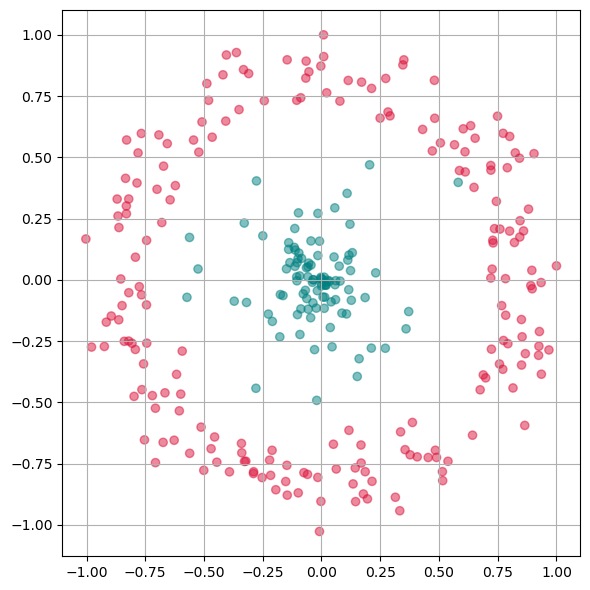

In [4]:
fig, ax = plt.subplots(figsize=(6 ,6))
ax.scatter(gen_data[0], gen_data[1], alpha=0.5, c=labels)
plt.grid(True)
plt.tight_layout()
plt.show()

First we will apply **PCA** to reduce this data to one dimension.

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_pca = pca.fit_transform(gen_data.T)

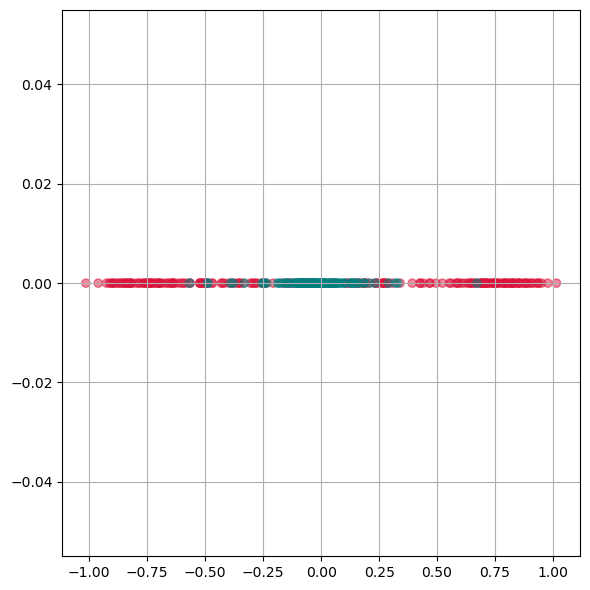

In [6]:
fig, ax = plt.subplots(figsize=(6 ,6))
ax.scatter(X_pca, np.zeros(300), alpha=0.5, c=labels)
plt.grid(True)
plt.tight_layout()
plt.show()

### Kernel-PCA

Kernel-PCA processes data in a higher-dimensional space, a technique often referred to as the "kernel trick." A commonly used kernel function in this context is the Radial Basis Function (RBF).

Initially, this approach might seem counterintuitive. The objective of dimensionality reduction is to simplify data, so why first move it into a higher-dimensional space? The purpose of this step is to overcome the limitations of linear transformations, such as the principal axis transformation or rotation found in PCA. By suitably projecting data into a higher-dimensional space, linear techniques can sometimes achieve more effective transformations, offering a more nuanced understanding of complex data sets.

**Advantages:**

- A non-linear technique, capable of handling non-linear data.
- Still relatively fast compared to other non-linear methods.

**Disadvantages:**

- Requires optimization of additional parameters, such as the choice of kernel function and its parameters.
- These parameters can significantly impact the results, making the process sensitive to these settings.

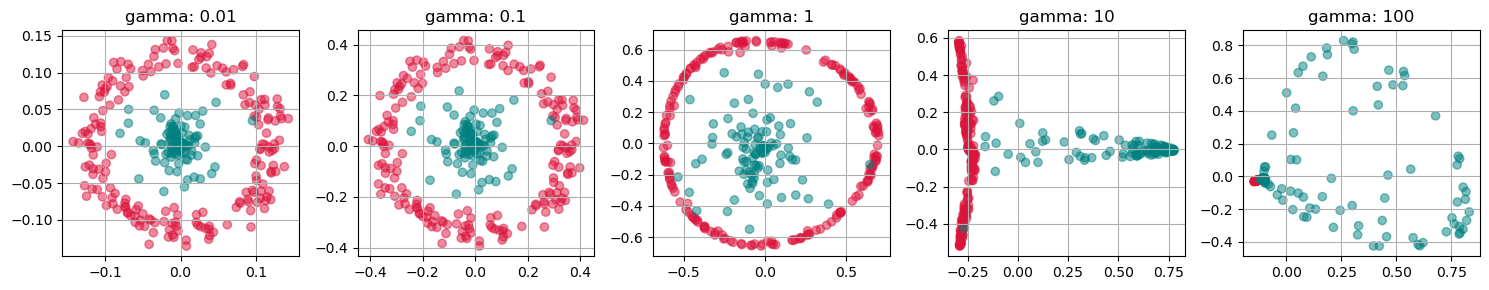

In [9]:
from sklearn.decomposition import KernelPCA

fig, axs = plt.subplots(1, 5, figsize=(15 ,3))

for i, gamma in enumerate([0.01, 0.1, 1, 10, 100]):
    kpca = KernelPCA(n_components=2, kernel="rbf",
                     gamma=gamma, random_state=42,
                     fit_inverse_transform=True, alpha=0.1)

    X_kpca = kpca.fit_transform(gen_data.T)

    axs[i].scatter(X_kpca[:, 0], X_kpca[:, 1], alpha=0.5, c=labels)
    axs[i].set_title(f"gamma: {gamma}")
    axs[i].grid(True)

plt.tight_layout()
plt.show()

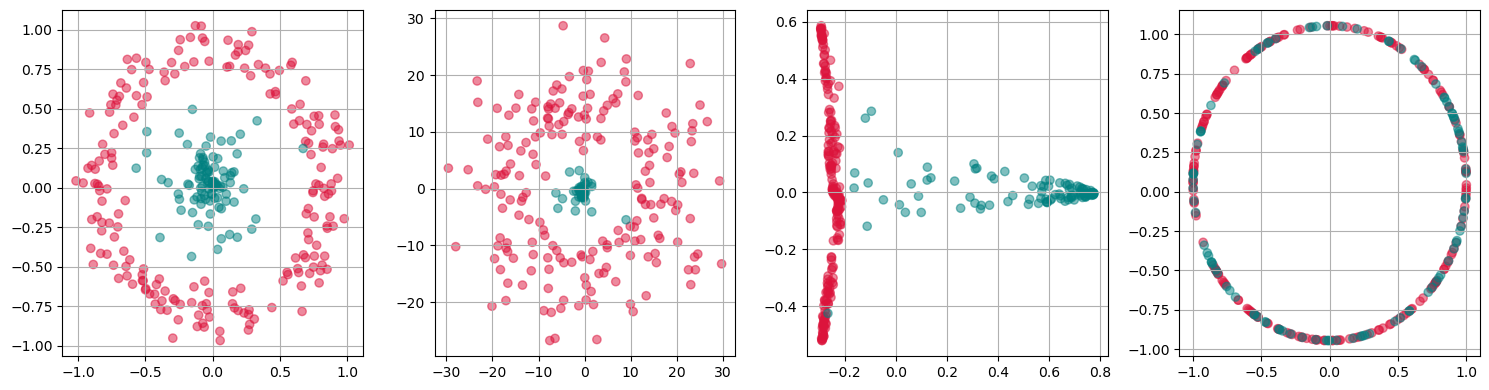

In [12]:
fig, axs = plt.subplots(1, 4, figsize=(15 ,4))

for i, kernel in enumerate(["linear", "poly", "rbf", "cosine"]):
    kpca = KernelPCA(n_components=2, kernel=kernel,
                     gamma=10, random_state=42,
                     fit_inverse_transform=True, alpha=0.1)

    X_kpca = kpca.fit_transform(gen_data.T)

    axs[i].scatter(X_kpca[:, 0], X_kpca[:, 1], alpha=0.5, c=labels)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

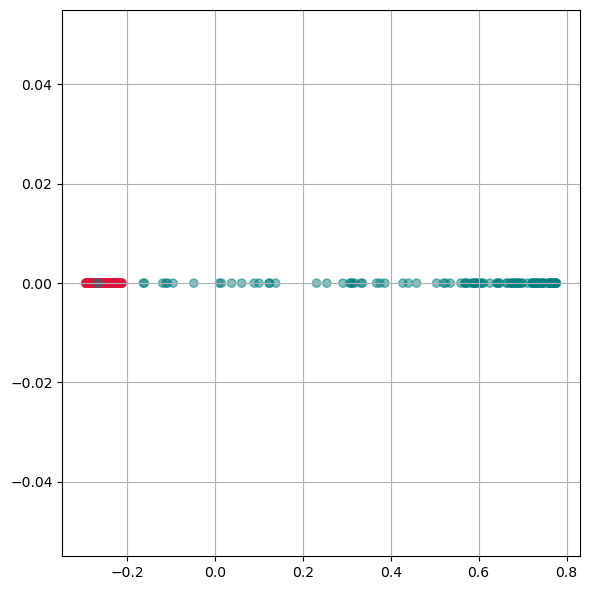

In [13]:
kpca = KernelPCA(n_components=1, kernel='rbf', 
                 gamma=10, random_state=42)
X_kpca = kpca.fit_transform(gen_data.T)

fig, ax = plt.subplots(figsize=(6 ,6))
ax.scatter(X_kpca, np.zeros(300), alpha=0.5, c=labels)
ax.grid(True)
plt.tight_layout()
plt.show()

### t-SNE

t-SNE is another non-linear technique that can manage non-linear data. It is known for producing high-quality results but is slower than PCA. This slower performance is due to its complexity and the additional parameters that need optimization.

**Advantages:**

- Non-linear, suitable for complex data structures.
- Produces high-quality, detailed results.

**Disadvantages:**

- Slower, especially for larger datasets.
- Requires careful tuning of parameters.

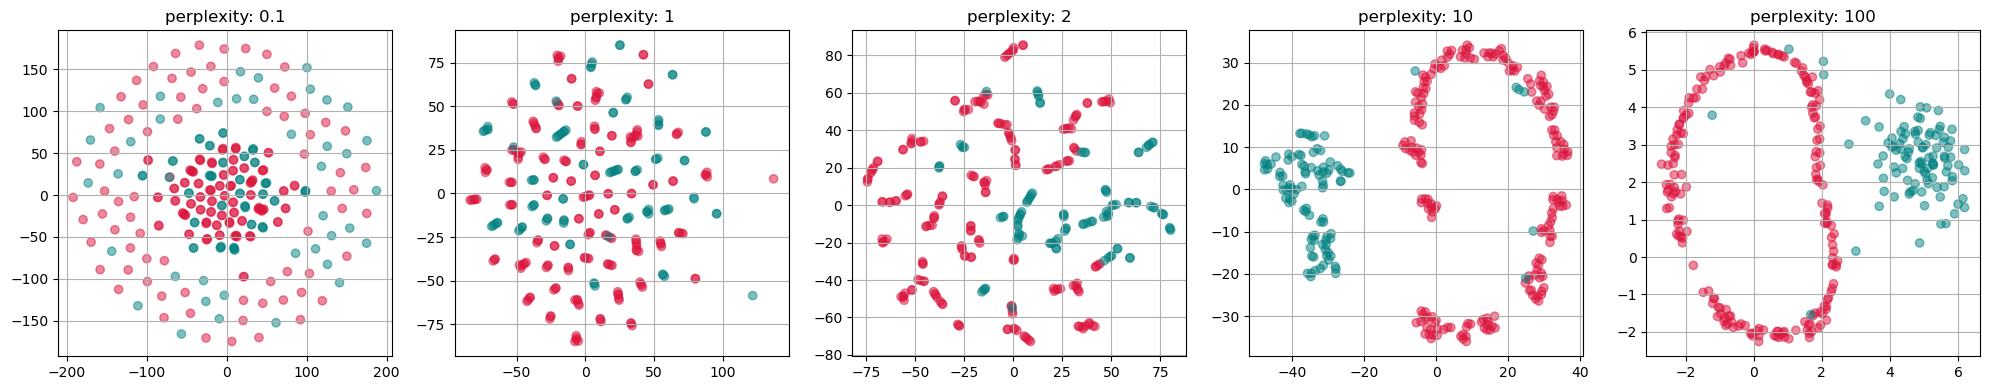

In [15]:
from sklearn.manifold import TSNE

perplexities = [0.1, 1, 2, 10, 100]
fig, axs = plt.subplots(1, len(perplexities), figsize=(4*len(perplexities) ,4))

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, init="random")
    X_tsne = tsne.fit_transform(gen_data.T)

    axs[i].scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5, c=labels)
    axs[i].set_title(f"perplexity: {perplexity}")
    axs[i].grid(True)

plt.tight_layout()
plt.show()

### UMAP (Uniform Manifold Approximation and Projection)

UMAP is a relatively recent addition to dimensionality reduction techniques. It is particularly effective for large datasets and is known for preserving more of the global data structure compared to methods like t-SNE.

**Advantages:**

- Efficient with large datasets.
- Preserves more global structure, providing a broader view of data relationships.
- Flexible and can be used in a variety of contexts.

**Disadvantages:**

- Like other non-linear methods, it requires parameter tuning.
- The results can be sensitive to these parameter choices.

### Comparison and Application

Each of these techniques has unique strengths and weaknesses, making them suitable for different types of data and objectives. Kernel-PCA is a versatile tool for moderately complex data, while t-SNE and UMAP excel in revealing intricate structures in high-dimensional data.

The choice of technique depends on the specific requirements of the analysis, such as the need for speed (favoring Kernel-PCA), detail (favoring t-SNE), or a balance of structure preservation and speed (favoring UMAP). Understanding the nature of the dataset and the goals of the analysis is key to selecting the most appropriate dimensionality reduction method.